In [23]:
import os

import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
folder_dataset = '../SCCvSD/data'
os.listdir(folder_dataset)

['worldcup_sampled_cameras.mat',
 'read_me.py',
 'worldcup2014.mat',
 'pred.png',
 '16_edge_image.jpg',
 'worldcup_dataset_camera_parameter.mat',
 'UoT_soccer',
 'test_network.jpg',
 'features',
 'train_data_10k.mat',
 'field.png',
 '16.jpg']

In [6]:
set_wc = sio.loadmat(os.path.join(folder_dataset, 'worldcup2014.mat'))
set_wc.keys()

dict_keys(['__header__', '__version__', '__globals__', 'points', 'line_segment_index', 'grid_points'])

In [8]:
set_wc['points'].shape, set_wc['line_segment_index'].shape, set_wc['grid_points'].shape

((302, 2), (151, 2), (2204, 2))

It is the playing ground model of soccer.

- points: N * 2, points in the model, for example, line intersections

- line_segment_index: N * 2, line segment start/end point index

- grid_points: a group of 2D points uniformly sampled inside of the playing ground. It is used to approximate the area of the playing ground.

In [9]:
set_camera = sio.loadmat(os.path.join(folder_dataset, 'worldcup_dataset_camera_parameter.mat'))
set_camera.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cc_max', 'cc_mean', 'cc_min', 'cc_std', 'fl_max', 'fl_mean', 'fl_min', 'fl_std'])

In [11]:
for col in set_camera.keys():
    if col not in ['__header__', '__version__', '__globals__']:
        print(f'{col}: {set_camera[col].shape}')

cc_max: (1, 3)
cc_mean: (1, 3)
cc_min: (1, 3)
cc_std: (1, 3)
fl_max: (1, 1)
fl_mean: (1, 1)
fl_min: (1, 1)
fl_std: (1, 1)


In [12]:
set_camera

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jan 29 09:43:18 2018',
 '__version__': '1.0',
 '__globals__': [],
 'cc_max': array([[ 60.84563315, -16.74178234,  23.01126126]]),
 'cc_mean': array([[ 52.36618474, -45.15650112,  16.82156705]]),
 'cc_min': array([[ 45.05679141, -66.0702037 ,  10.13871263]]),
 'cc_std': array([[2.23192608, 9.3825635 , 2.94875254]]),
 'fl_max': array([[5696.98454881]]),
 'fl_mean': array([[3018.18139785]]),
 'fl_min': array([[1463.16468414]]),
 'fl_std': array([[716.06817106]])}

This is the camera parameters of the world cup dataset.

- cc: for camera center, a 3D world coordinate

cc_mean:

cc_std:

cc_min:

cc_max:

- fl: for focal length, a float value

fl_mean:

fl_std:

fl_min:

fl_max:

In [13]:
set_sampled_camera = sio.loadmat(os.path.join(folder_dataset, 'worldcup_sampled_cameras.mat'))
set_sampled_camera

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Feb 19 11:21:36 2018',
 '__version__': '1.0',
 '__globals__': [],
 'pivot_cameras': array([[ 640.        ,  360.        , 1843.08621378, ...,   51.7253127 ,
          -55.24253027,   13.74160413],
        [ 640.        ,  360.        , 2735.76013777, ...,   55.36814963,
          -47.5103074 ,   15.00193977],
        [ 640.        ,  360.        , 2636.98820848, ...,   50.9680075 ,
          -56.35552395,   13.2762879 ],
        ...,
        [ 640.        ,  360.        , 3319.46908359, ...,   52.60629493,
          -57.71904541,   15.12940686],
        [ 640.        ,  360.        , 2724.55301309, ...,   52.67773725,
          -35.7664836 ,   10.13871263],
        [ 640.        ,  360.        , 1923.31532548, ...,   52.70421148,
          -42.88357047,   13.45612492]]),
 'positive_cameras': array([[ 640.        ,  360.        , 1837.70153027, ...,   51.7253127 ,
          -55.24253027,   13.74160413],
        [ 6

In [14]:
set_sampled_camera['pivot_cameras'].shape, set_sampled_camera['positive_cameras'].shape, set_sampled_camera['positive_ious'].shape

((91173, 9), (91173, 9), (91173, 1))

It has about ~90K positive camera pairs
 - pivot_cameras: N * 9, pivot cameras used in training
 - positive_cameras: N * 9, positive camera with the pivot camera
 - positive_ious: N * 9, IoU of each pivot and positive pair

In [16]:
set_train_data = sio.loadmat(os.path.join(folder_dataset, 'train_data_10k.mat'))    
set_train_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Apr  4 18:27:51 2022',
 '__version__': '1.0',
 '__globals__': [],
 'pivot_images': array([[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],
 
 
        ...,
 
 
        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0

In [18]:
set_train_data['pivot_images'].shape, set_train_data['positive_images'].shape, set_train_data['cameras'].shape

((10000, 1, 180, 320), (10000, 1, 180, 320), (10000, 9))

In [24]:
ex_pivot = set_train_data['pivot_images'][0]
ex_positive = set_train_data['positive_images'][0]

plt.imshow(np.moveaxis(ex_pivot, 0, -1));

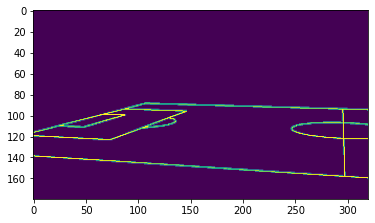

In [25]:
plt.imshow(np.moveaxis(ex_positive, 0, -1));

It has 10k pivot and positive images.
- pivot_images: N x 1 x 180 x 320, [mean, std] = [0.0188 0.128] (after normalized to [0, 1])
- positive_images: N x 1 x 180 x 320

In [26]:
set_camera_db_ftrs = sio.loadmat(os.path.join(folder_dataset, 'features', 'database_camera_feature.mat'))
set_camera_db_ftrs

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue May 14 08:00:39 2019',
 '__version__': '1.0',
 '__globals__': [],
 'cameras': array([[ 640.        ,  360.        , 1843.08621378, ...,   51.7253127 ,
          -55.24253027,   13.74160413],
        [ 640.        ,  360.        , 2735.76013777, ...,   55.36814963,
          -47.5103074 ,   15.00193977],
        [ 640.        ,  360.        , 2636.98820848, ...,   50.9680075 ,
          -56.35552395,   13.2762879 ],
        ...,
        [ 640.        ,  360.        , 3319.46908359, ...,   52.60629493,
          -57.71904541,   15.12940686],
        [ 640.        ,  360.        , 2724.55301309, ...,   52.67773725,
          -35.7664836 ,   10.13871263],
        [ 640.        ,  360.        , 1923.31532548, ...,   52.70421148,
          -42.88357047,   13.45612492]]),
 'features': array([[-3.7205544e-01, -9.0870142e-02, -2.5975457e-01, ...,
          2.2758098e-01,  4.9577397e-01,  7.6366253e-02],
        [ 2.6711482e-0

In [27]:
set_camera_db_ftrs['cameras'].shape, set_camera_db_ftrs['features'].shape

((91173, 9), (91173, 16))

database_camera_feature.mat
- It has about ~90K (camera, feature) pairs
- cameras: N x 9
- features: N x 16, deep feature

In [28]:
set_testset = sio.loadmat(os.path.join(folder_dataset, 'features', 'testset_feature.mat'))
set_testset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Mar 30 20:26:17 2018',
 '__version__': '1.0',
 '__globals__': [],
 'edge_distances': array([[[[ 10.326168 ,  10.326168 ,  10.326168 , ...,  10.326168 ,
            10.326168 ,  10.326168 ]],
 
         [[ 10.326168 ,  10.326168 ,  10.326168 , ...,  10.326168 ,
            10.326168 ,  10.326168 ]],
 
         [[ 10.326168 ,  10.326168 ,  10.326168 , ...,  10.326168 ,
            10.326168 ,  10.326168 ]],
 
         ...,
 
         [[ 10.326168 ,  10.326168 ,  10.326168 , ...,  10.326168 ,
            10.326168 ,  10.326168 ]],
 
         [[ 10.326168 ,  10.326168 ,  10.326168 , ...,  10.326168 ,
            10.326168 ,  10.326168 ]],
 
         [[ 10.326168 ,  10.326168 ,  10.326168 , ...,  10.326168 ,
            10.326168 ,  10.326168 ]]],
 
 
        [[[ 10.326168 ,  10.326168 ,  10.326168 , ...,  10.326168 ,
            10.326168 ,  10.326168 ]],
 
         [[ 10.326168 ,  10.326168 ,  10.326168 , ...,  10.326

In [29]:
set_testset['edge_distances'].shape, set_testset['edge_map'].shape, set_testset['features'].shape

((180, 320, 1, 186), (720, 1280, 1, 186), (16, 186))

In [30]:
ex_edge_dist = set_testset['edge_distances'][0]
ex_edge_map = set_testset['edge_map'][0]

In [34]:
ex_edge_dist.shape, ex_edge_map.shape

((320, 1, 186), (1280, 1, 186))

In [40]:
np.moveaxis(np.moveaxis(ex_edge_dist, 0, 2), 0, -1).shape

(186, 320, 1)

In [42]:
plt.imshow(np.moveaxis(np.moveaxis(ex_edge_dist, 0, 2), 0, -1));

In [43]:
plt.imshow(np.moveaxis(np.moveaxis(ex_edge_map, 0, 2), 0, -1));